

# Project: Investigation of no-show medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The main purpose of this data analysis is to find what factors affect the no-shows. 

> Below is the list of questions to be answered by the data analysis.

### Questions
>1. What age is associated with the highest no-show rate?
>2. Does longer waiting time contributes to the higher no-show rate?
>3. Does gender has an influence on the no-show rate?
>4. Does SMS notification increases show-up appointments?

In [1]:
# Import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> Data wrangling consists of three main steps:
> 1. Data gathering: loading the data from a source (Kaggle).
> 2. Data assessing: quick investigation of data to build intuition about the dataset
> 3. Data cleaning: fixing incorrect data types, correcting of missing data, removing duplicates and outliers.

### Data gathering

In [28]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [29]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No



### Data Assessing

In [3]:
#this returns a tuple of the dimensions of the dataframe
df.shape

(110527, 14)

In [4]:
#this returns the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#further investigation of a datatype
type(df.Gender[0])

str

In [6]:
#further investigation of a datatype
type(df.ScheduledDay[0])

str

In [7]:
#further investigation of a datatype
type(df.AppointmentDay[0])

str

In [8]:
#further investigation of a datatype
type(df.Neighbourhood[0])

str

In [9]:
#this displays a summary of the dataframe including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
#this returns the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
#this returns descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
#count of duplicates in the dataset
sum(df.duplicated())

0

### Data Cleaning

In [13]:
#fixing the data types
#converting PatientId and AppointmentID to string
df.PatientId=df.PatientId.astype('Int64').astype('str')
df.AppointmentID=df.AppointmentID.astype('str')

In [14]:
#converting ScheduledDay and AppointmentDay to date
df.ScheduledDay= pd.to_datetime(df.ScheduledDay).dt.date
df.AppointmentDay= pd.to_datetime(df.AppointmentDay).dt.date

In [15]:
#creating a column 'Awaiting time', which represents the number of days between the appointment day and scheduled appointment
df['Awaiting_time']=(df.AppointmentDay-df.ScheduledDay)
df['Awaiting_time'].describe()

count                     110527
mean     10 days 04:24:31.828602
std      15 days 06:07:11.673762
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: Awaiting_time, dtype: object

In [16]:
#removing outliers, where the awaiting time is negative
df=df[df.Awaiting_time >= '0']

In [17]:
#removing outliers
df=df.query('Age >= 0')

In [18]:
#renaming the columns
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [19]:
#converting No_show column to boolean
df.No_show=(df.No_show == 'Yes')

In [20]:
#converting SMS_received column to boolean
df.SMS_received=(df.SMS_received==1)

In [21]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Awaiting_time
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,False,False,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,False,False,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,False,False,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,False,False,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,False,False,0 days


In [22]:
#
df.shape

(110521, 15)

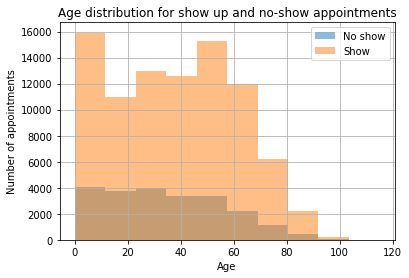

In [25]:
#check of age distribution
df.Age[df.No_show==True].hist(alpha=0.5, label='No show')
df.Age[df.No_show==False].hist(alpha=0.5, label='Show')
plt.ylabel('Number of appointments')
plt.xlabel('Age')
plt.title('Age distribution for show up and no-show appointments')
plt.legend();

<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning the data, exploratory data analysis will be conducted. For each question, graphics will be created to visualize relationship between variables to answer the question posed in the Introduction section.

### Question 1: What age is associated with the highest no-show rate?

In [90]:
# Age is splitted in 4 age categories: Child, Youth, Adult and Senior
# Bin edges that will be used to "cut" the data into the age groups
bin_edges=[-1,14,24,64,df.Age.max()]
bin_names=['child','youth','adult','senior']
df['Age_group']=pd.cut(df.Age, bins=bin_edges, labels=bin_names)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Awaiting_time,Age_group,Awaiting_time_level
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,False,False,0 days,adult,short
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,False,False,0 days,adult,short
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,False,False,0 days,adult,short
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,False,False,0 days,child,short
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,False,False,0 days,adult,short


In [91]:
#finding proportions by Age group and no-show rates
age_counts=df.groupby(['No_show','Age_group'])['No_show'].count()
age_totals=df.groupby('No_show')['No_show'].count()
age_show_proportions=(age_counts[False]/age_totals[False])
age_no_show_proportions=(age_counts[True]/age_totals[True])

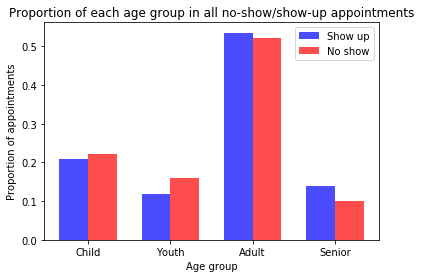

In [94]:
# grouped bar plot
ind = np.arange(len(age_show_proportions))  # the x locations for the groups
width = 0.35   

plt.bar(ind, age_show_proportions, width, color='b', alpha=.7, label='Show up')
plt.bar(ind + width, age_no_show_proportions, width, color='r', alpha=.7, label='No show')

# title and labels
plt.ylabel('Proportion of appointments')
plt.xlabel('Age group')
plt.title('Proportion of each age group in all no-show/show-up appointments')
locations = ind + width / 2  # xtick locations
labels = ['Child', 'Youth', 'Adult', 'Senior']  # xtick labels
plt.xticks(locations, labels)
plt.legend()

#Red bar proportions = counts for each age group / total # of no-show appointments
#Blue bar proportions = counts for each age group / total # of show-up appointments

> Adults have the highest proportion of both show-up and no-show appointments. Senior patients have the lowest no-show rate among all age groups. Youth have the lowest show-up rate among all age groups. 

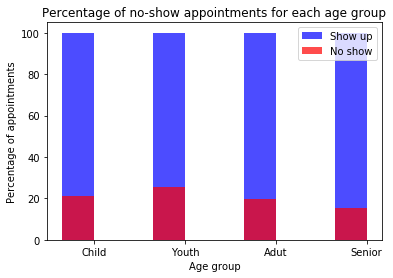

In [93]:
# This creates a stacked bar chart showing the percentage of the no-show appointments for each
# age group

age_totals_group=df.groupby('Age_group')['No_show'].count()
percentage_age=(age_counts/age_totals_group)*100

#stacked bar chart display
ind = np.arange(len(age_show_proportions))  # the x locations for the groups
width = 0.35   

plt.bar(ind, 100, width, color='b', alpha=.7, label='Show up')
plt.bar(ind, percentage_age[True], width, color='r', alpha=.7, label='No show')

# title and labels
plt.ylabel('Percentage of appointments')
plt.xlabel('Age group')
plt.title('Percentage of no-show appointments for each age group')  
labels = ['Child', 'Youth', 'Adut', 'Senior']  
plt.xticks(locations, labels)
plt.legend()

> Conclusion: Senior patients (64 years old and above) have lower percentage of no-show appointments compared to other age groups. For the young people the no-show rate is the highest. That means that age has influence on the no-show rate.

### Question 2: Does longer awaiting time contributes to the higher no-show rate?

In [95]:
#Splitting waiting time in 4 groupes: short, average, long and very long
bin_edges = np.array([np.timedelta64(d,'D') for d in [ -1, 7, 25, 60, 179]])
bin_names=['short','average','long','very long']
df['Awaiting_time_level']=pd.cut(df.Awaiting_time, bins=bin_edges, labels=bin_names)

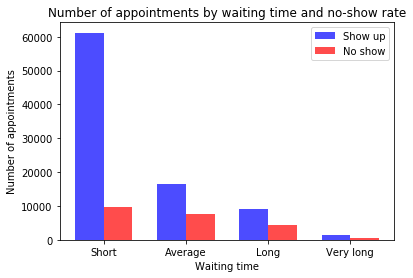

In [96]:
# This creates a grouped bar chart with the number of show up and no-show appointments for 
# each waiting time category
ind = np.arange(len(show_proportions))  # the x locations for the groups
width = 0.35   

plt.bar(ind, time_counts[False], width, color='b', alpha=.7, label='Show up')
plt.bar(ind + width, time_counts[True], width, color='r', alpha=.7, label='No show')

# title and labels
plt.ylabel('Number of appointments')
plt.xlabel('Waiting time')
plt.title('Number of appointments by waiting time and no-show rate')
locations = ind + width / 2  
labels = ['Short', 'Average', 'Long', 'Very long']  
plt.xticks(locations, labels)
plt.legend()

In [97]:
# This returns a grouped bar chart with the proportion of the appointments by waiting time and
# show-up/no-show rate
time_counts=df.groupby(['No_show','Awaiting_time_level'])['No_show'].count()
time_totals=df.groupby('No_show')['Awaiting_time_level'].count()
show_proportions=(time_counts[False]/time_totals[False])
no_show_proportions=(time_counts[True]/time_totals[True])

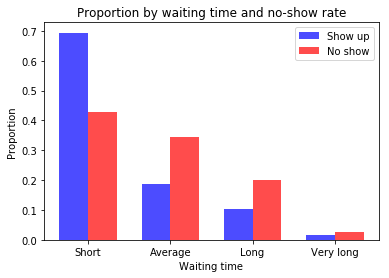

In [98]:
ind = np.arange(len(show_proportions))  
width = 0.35   

plt.bar(ind, show_proportions, width, color='b', alpha=.7, label='Show up')
plt.bar(ind + width, no_show_proportions, width, color='r', alpha=.7, label='No show')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Waiting time')
plt.title('Proportion by waiting time and no-show rate')
locations = ind + width / 2 
labels = ['Short', 'Average', 'Long', 'Very long']  
plt.xticks(locations, labels)
plt.legend()

#Red bar proportions = counts for each waiting time group / total # of no-show appointments
#Blue bar proportions = counts for each waiting time group / total # of show-up appointments

>Appointments with short waiting time have the highest proportion of show-up and no-show appointments. As waiting time increases, proportion of both show-up and no-show appointments decreases. 

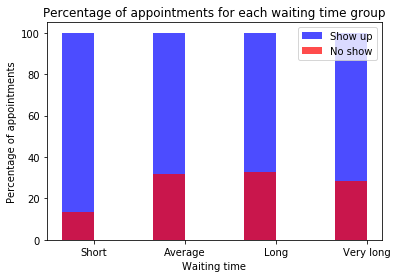

In [100]:
#This creates a stacked bar chart showing the percentage of the no-show appointments for each
#waiting time group

time_totals_level=df.groupby('Awaiting_time_level')['No_show'].count()

proportion=(time_counts/time_totals_level)*100

#stacked bar chart display
ind = np.arange(len(show_proportions))  # the x locations for the groups
width = 0.35   

plt.bar(ind, 100, width, color='b', alpha=.7, label='Show up')
plt.bar(ind, proportion[True], width, color='r', alpha=.7, label='No show')

# title and labels
plt.ylabel('Percentage of appointments')
plt.xlabel('Waiting time')
plt.title('Percentage of appointments for each waiting time group')  
labels = ['Short', 'Average', 'Long', 'Very long']  #
plt.xticks(locations, labels)
plt.legend()

For the appointments with short waiting time (maximum 2 weeks) the no-show rate is significantly lower compared to the appointments with longer waiting times. That means that the waiting time have has an influence on the no-show rate.



### Questions 3: Does gender has influence on no-show rate?

In [101]:
gender_counts = df.groupby(['No_show','Gender'])['No_show'].count()
gender_totals= df.groupby('Gender')['No_show'].count()
proportions=gender_counts/gender_totals

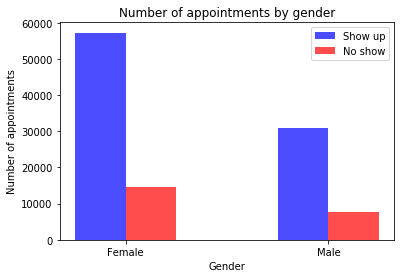

In [102]:
ind = np.arange(len(gender_totals))  # the x locations for the groups
width = 0.25   

plt.bar(ind, gender_counts[False], width, color='b', alpha=.7, label='Show up')
plt.bar(ind + width, gender_counts[True], width, color='r', alpha=.7, label='No show')

# title and labels
plt.ylabel('Number of appointments')
plt.xlabel('Gender')
plt.title('Number of appointments by gender')
locations = ind + width / 2  
labels = ['Female', 'Male']  
plt.xticks(locations, labels)
plt.legend()

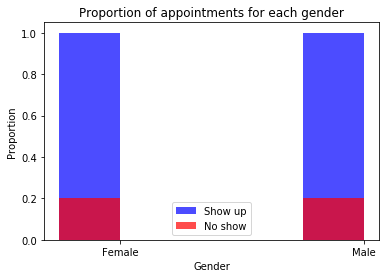

In [106]:
ind = np.arange(len(gender_totals))  # the x locations for the groups
width = 0.25   

plt.bar(ind, 1, width, color='b', alpha=.7, label='Show up')
plt.bar(ind, proportions[True], width, color='r', alpha=.7, label='No show')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.title('Proportion of appointments for each gender')
locations = ind + width / 2  
labels = ['Female', 'Male']  
plt.xticks(locations, labels)
plt.legend()

> Conclusion: The same proportion of men and women didn't show up for the appointments. That means that gender has no influence on no-show appointments.

### Question 4: Does SMS notification increases show-up appointments?

In [88]:
sms_counts = df.groupby(['SMS_received','No_show'])['No_show'].count()
sms_totals= df.groupby('SMS_received')['No_show'].count()
sms_proportions=sms_counts/sms_totals

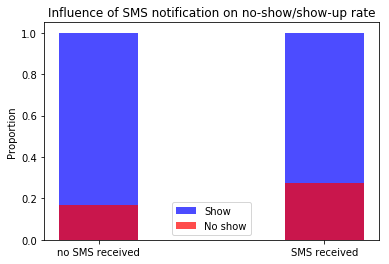

In [89]:
ind = np.arange(len(sms_totals))  # the x locations for the groups
width = 0.35   

plt.bar(ind, 1, width, color='b', alpha=.7, label='Show')
plt.bar(ind, sms_proportions[:,True], width, color='r', alpha=.7, label='No show')

# title and labels
plt.ylabel('Proportion')
plt.title('Influence of SMS notification on no-show/show-up rate')
locations = ind  
labels = ['no SMS received', 'SMS received']  
plt.xticks(locations, labels)
plt.legend()

> Conclusion: SMS notification doesn't help to increase no-show rates. In fact, higher proportion of patients which showed up for the appointments didn't receive SMS.

<a id='conclusions'></a>
## Conclusions

> 1. Senior patients (64 years old and above) have lower percentage of no-show appointments compared to other age groups. For the young people the no-show rate is the highest. That means that age has influence on the no-show rate.

> 2. For the appointments with short waiting time (maximum 2 weeks) the no-show rate is significantly lower compared to the appointments with longer waiting times. That means that the waiting time have has an influence on the no-show rate.

> 3. The same proportion of men and women didn't show up for the appointments. That means that gender has no influence on no-show appointments.

> 4. SMS notification doesn't help to increase no-show rates. In fact, higher proportion of patients which showed up for the appointments didn't receive SMS.

> 5. The dataset has some limitations. First, the data is collected for the three months. Using a 12-month period would give more reliable statistics and also reflect the seasonal changes. Another limitation is that the appointment time is not specified. Patients which have the appointments during the normal working hours are more likely to skip the appointment. The patients which have their appointments outside working hours and on the weekends have a higher chance to show up. 


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0